In [ ]:
import torch
from torch import nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
weight = 0.7
bias = 0.2

X = torch.arange(0,1, 0.02).unsqueeze(dim=1)
y = weight * X + bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.2000],
         [0.2140],
         [0.2280],
         [0.2420],
         [0.2560],
         [0.2700],
         [0.2840],
         [0.2980],
         [0.3120],
         [0.3260]]))

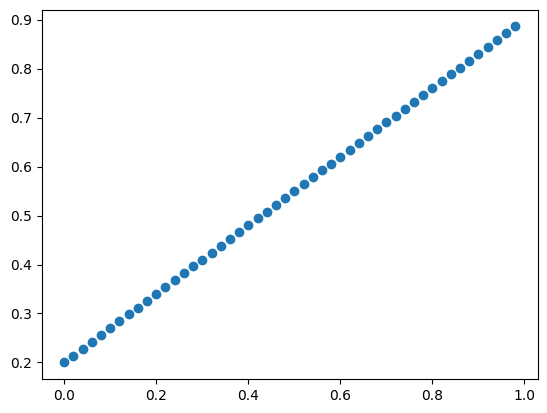

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X,y)
plt.show()

In [ ]:
train_split = int(0.8 * len(X))
X_train , y_train = X[:train_split], y[:train_split]
X_test , y_test = X[train_split:], y[train_split:]

In [ ]:
#lets build the model now

In [ ]:
torch.randn(1)

tensor([-1.0085])

In [ ]:
class LRmodel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad = True,
                                            dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad = True,
                                         dtype = torch.float))
  def forward(self, x : torch.tensor) -> torch.Tensor:
    return self.weights * x + self.bias


In [ ]:
torch.manual_seed(42)
model_0 = LRmodel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds


tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)


In [ ]:
epochs = 500

epoch_count = []
loss_count = []
testloss_count = []

for epooch in range(epochs):
  model_0.train() ### sets all grads to true if they need grads

  #forward pass
  y_preds = model_0(X_train)

  #loss function
  loss = loss_fn(y_preds, y_train)


  #optimizer
  optimizer.zero_grad()

  #backprop
  loss.backward()

  #step the optimizer(preforming grad descent)
  optimizer.step()


  model_0.eval() ### turn of the gradients
  with torch.inference_mode():
    test_preds = model_0(X_test)
    test_loss = loss_fn(test_preds, y_test)

  if epochs % 10 == 0:
    epoch_count.append(epooch)
    loss_count.append(loss)
    testloss_count.append(test_loss)
    print(f'epoch: {epochs} | loss: {loss} | test_loss: {test_loss}')
    print(model_0.state_dict())

epoch: 500 | loss: 0.21288137137889862 | test_loss: 0.38106516003608704
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
epoch: 500 | loss: 0.20136037468910217 | test_loss: 0.3675941526889801
OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])
epoch: 500 | loss: 0.18983933329582214 | test_loss: 0.35412317514419556
OrderedDict([('weights', tensor([0.3484])), ('bias', tensor([0.1588]))])
epoch: 500 | loss: 0.1783183515071869 | test_loss: 0.340652197599411
OrderedDict([('weights', tensor([0.3523])), ('bias', tensor([0.1688]))])
epoch: 500 | loss: 0.16679733991622925 | test_loss: 0.3271811604499817
OrderedDict([('weights', tensor([0.3562])), ('bias', tensor([0.1788]))])
epoch: 500 | loss: 0.1552763283252716 | test_loss: 0.31371015310287476
OrderedDict([('weights', tensor([0.3601])), ('bias', tensor([0.1888]))])
epoch: 500 | loss: 0.14375531673431396 | test_loss: 0.3002391457557678
OrderedDict([('weights', tensor([0.3640])), ('bias', tensor([0.19

In [ ]:
import numpy as np

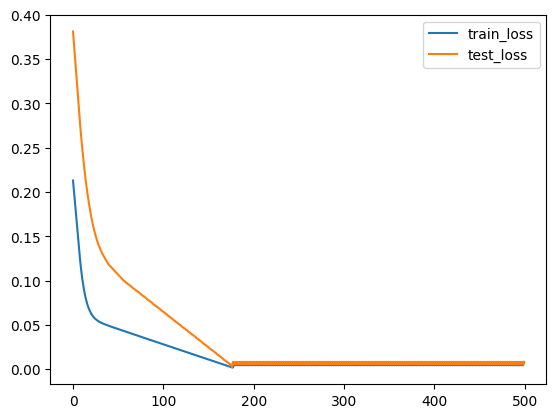

In [ ]:
plt.plot(epoch_count, np.array(torch.tensor(loss_count).numpy()), label = 'train_loss')
plt.plot(epoch_count, testloss_count, label = 'test_loss')
plt.legend()

In [ ]:
y_test

tensor([[0.7600],
        [0.7740],
        [0.7880],
        [0.8020],
        [0.8160],
        [0.8300],
        [0.8440],
        [0.8580],
        [0.8720],
        [0.8860]])

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

y_preds_new

tensor([[0.7525],
        [0.7663],
        [0.7802],
        [0.7940],
        [0.8079],
        [0.8217],
        [0.8356],
        [0.8494],
        [0.8632],
        [0.8771]])

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});


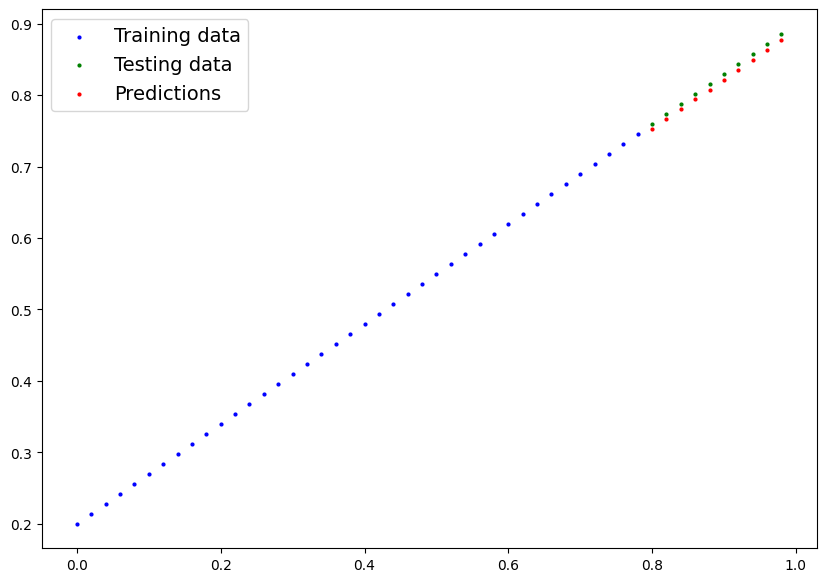

In [ ]:
plot_predictions(predictions = y_preds_new)

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
w = 0.9
b = 0.3
X = torch.arange(0,2,0.04).unsqueeze(dim=1)
y = w * X + b

X[:5], y[:5]

(tensor([[0.0000],
         [0.0400],
         [0.0800],
         [0.1200],
         [0.1600]]),
 tensor([[0.3000],
         [0.3360],
         [0.3720],
         [0.4080],
         [0.4440]]))

In [ ]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

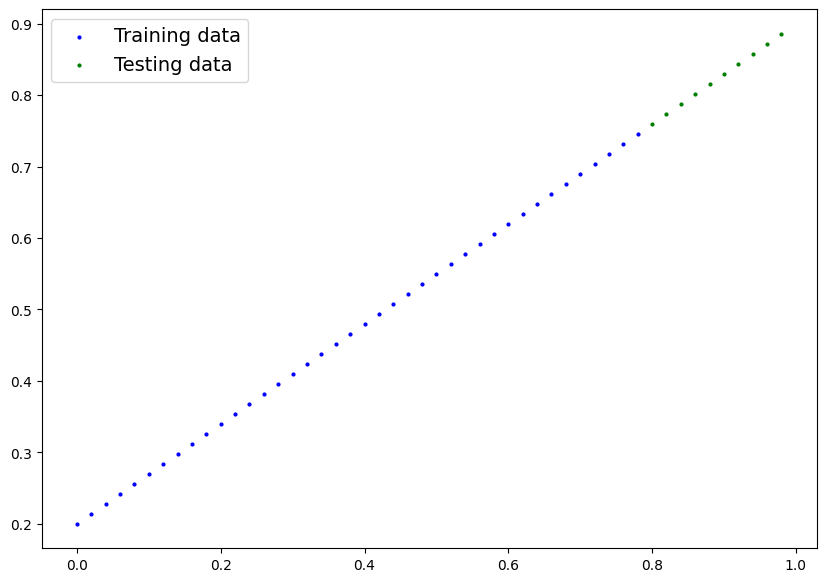

In [ ]:
plot_predictions()

In [ ]:
class LRModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                             dtype = torch.float)) ##requires_grad is true by default
    self.bias = nn.Parameter(torch.randn(1,
                                          dtype = torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias


In [ ]:
model = LRModel()
model.state_dict()

OrderedDict([('weights', tensor([0.4617])), ('bias', tensor([0.2674]))])

In [ ]:
loss_fn = nn.L1Loss()


In [ ]:
epochs = 2000
epoch_count = []
loss_count = []
test_loss_count = []

optimizer = torch.optim.SGD(params = list(model.parameters()),
                            lr = 0.01 if epochs > 500 else 0.001)

for epoch in range(epochs):
  model.train()

  y_preds = model(X_train)

  loss = loss_fn(y_preds, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model.eval()
  with torch.inference_mode():
    test_preds = model(X_test)
    test_loss = loss_fn(test_preds, y_test)

    epoch_count.append(epoch)
    loss_count.append(loss)
    test_loss_count.append(test_loss)

  if epoch % 100 == 0:
    print(f'epoch: {epoch} | train_loss: {loss} | test_loss: {test_loss}')
    print(model.state_dict())


epoch: 0 | train_loss: 0.37455645203590393 | test_loss: 0.7890152335166931
OrderedDict([('weights', tensor([0.4695])), ('bias', tensor([0.2774]))])
epoch: 100 | train_loss: 0.018338877707719803 | test_loss: 0.033917032182216644
OrderedDict([('weights', tensor([0.8586])), ('bias', tensor([0.3399]))])
epoch: 200 | train_loss: 0.013530922122299671 | test_loss: 0.0015305280685424805
OrderedDict([('weights', tensor([0.8990])), ('bias', tensor([0.3034]))])
epoch: 300 | train_loss: 0.013530922122299671 | test_loss: 0.0015305280685424805
OrderedDict([('weights', tensor([0.8990])), ('bias', tensor([0.3034]))])
epoch: 400 | train_loss: 0.013530922122299671 | test_loss: 0.0015305280685424805
OrderedDict([('weights', tensor([0.8990])), ('bias', tensor([0.3034]))])
epoch: 500 | train_loss: 0.013530922122299671 | test_loss: 0.0015305280685424805
OrderedDict([('weights', tensor([0.8990])), ('bias', tensor([0.3034]))])
epoch: 600 | train_loss: 0.013530922122299671 | test_loss: 0.0015305280685424805
Or

In [ ]:
with torch.inference_mode():
  y_preds_new = model(X_test)

y_preds_new

tensor([[1.7192],
        [1.7549],
        [1.7905],
        [1.8262],
        [1.8618],
        [1.8975],
        [1.9331],
        [1.9688],
        [2.0044],
        [2.0401]])

In [ ]:
y_test

tensor([[1.7400],
        [1.7760],
        [1.8120],
        [1.8480],
        [1.8840],
        [1.9200],
        [1.9560],
        [1.9920],
        [2.0280],
        [2.0640]])

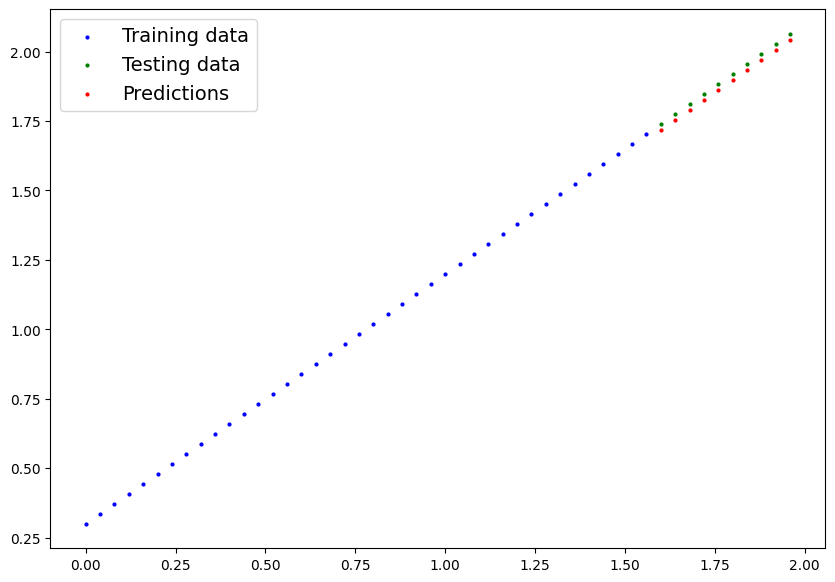

In [ ]:
plot_predictions(predictions = y_preds_new)

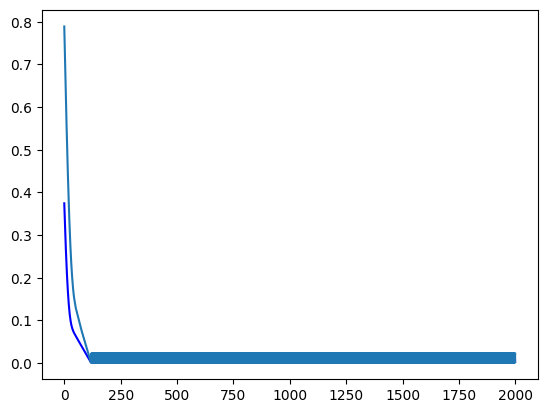

In [ ]:
import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(loss_count).numpy()), color = 'b')
plt.plot(epoch_count, test_loss_count)
plt.show()

In [ ]:
torch.save(obj = model.state_dict(),
         f = 'model.pth')

In [ ]:
loaded_model = torch.load(f = 'model.pth')
loaded_model

OrderedDict([('weights', tensor([0.8912])), ('bias', tensor([0.2934]))])